# Intro to Data Science - Final Project

## Introduction

### Set up Data and Packages


First we import the necessary packages.

In [281]:
%matplotlib inline 
import numpy as np
import scipy.stats
import pandas
import matplotlib.pyplot as plt

We then read the turnstile data and have a look at the first few entries.

In [282]:
turnstileData = pandas.read_csv("turnstile_data_master_with_weather.csv")
print turnstileData.head(3)

   Unnamed: 0  UNIT       DATEn     TIMEn  Hour    DESCn  ENTRIESn_hourly  \
0           0  R001  2011-05-01  01:00:00     1  REGULAR                0   
1           1  R001  2011-05-01  05:00:00     5  REGULAR              217   
2           2  R001  2011-05-01  09:00:00     9  REGULAR              890   

   EXITSn_hourly  maxpressurei  maxdewpti   ...     meandewpti  meanpressurei  \
0              0         30.31         42   ...             39          30.27   
1            553         30.31         42   ...             39          30.27   
2           1262         30.31         42   ...             39          30.27   

   fog  rain  meanwindspdi  mintempi  meantempi  maxtempi  precipi  thunder  
0    0     0             5        50         60        69        0        0  
1    0     0             5        50         60        69        0        0  
2    0     0             5        50         60        69        0        0  

[3 rows x 22 columns]


## Section 1. Statistical Test

We are interested into whether there is any significant difference on the number of entries (EntriesN) between rainy and non rainy days. The statistical test used to analyze the NYC subway data is the Mann Whitney U test. The Mann Whitney U test is appropriate in our case, as it is a non-parametric test that does not require the underlying population to be normal (see histogram below).


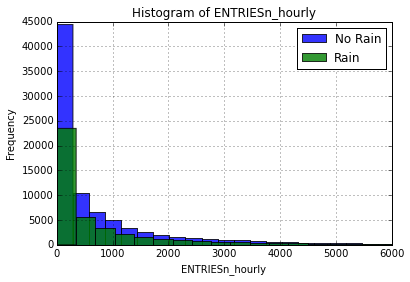

In [283]:
plt.figure()
# plot a historgram for hourly entries when it is not raining
turnstileData[turnstileData["rain"] == 0]["ENTRIESn_hourly"].hist(bins = 150, alpha = 0.8, label = "No Rain")
# plot a historgram for hourly entries when it is raining
turnstileData[turnstileData["rain"] == 1]["ENTRIESn_hourly"].hist(bins = 150, alpha = 0.8, label = "Rain")
x1,x2,y1,y2 = plt.axis()
plt.axis([0, 6000, y1, 45000])
plt.legend()
plt.title("Histogram of ENTRIESn_hourly")
plt.xlabel("ENTRIESn_hourly")
plt.ylabel("Frequency")

We will take the mean for each group (rain vs no rain) and run the Mann Whitney U-test on the ENTRIESn_hourly column in the turnstileData dataframe. The null hypothesis is that there is no difference between the means for ENTRIESn_hourly between rainy and non-rainy days and the alternative hypothesis is that the mean of ENTRIESn_hourly is greater for rainy days (one sided test).

In [284]:
with_rain_mean = np.mean(turnstileData[turnstileData["rain"] == 1]["ENTRIESn_hourly"])
without_rain_mean = np.mean(turnstileData[turnstileData["rain"] == 0]["ENTRIESn_hourly"])

U, p = scipy.stats.mannwhitneyu(turnstileData[turnstileData["rain"] == 1]["ENTRIESn_hourly"], 
                                turnstileData[turnstileData["rain"] == 0]["ENTRIESn_hourly"])

print 'Mean of Rain Group: ' + str(with_rain_mean)
print 'Mean of No Rain Group: ' + str(without_rain_mean)
print 'U, p = ' + str(U) +', ' + str(p)


Mean of Rain Group: 1105.44637675
Mean of No Rain Group: 1090.27878015
U, p = 1924409167.0, 0.0193096344138


With a p-value of approximately 0.02 (and a significance threshold of 0.05 - p-critical) we can reject the null hypothesis.

## Section 2. Linear Regression

In this section we will attempt to create a linear regression model to help us predict the daily entries to stations, i.e. our dependent variable is ENTRIESn_hourly.

In order to fit our model we will use Ordinary Least Squares Regression. 

In [285]:
# Import packages
import statsmodels.api as sm 
import random
import pandas

Let's have a look at the available features and decide which of them will be used in our model.

['Unnamed: 0' 'UNIT' 'DATEn' 'TIMEn' 'Hour' 'DESCn' 'ENTRIESn_hourly'
 'EXITSn_hourly' 'maxpressurei' 'maxdewpti' 'mindewpti' 'minpressurei'
 'meandewpti' 'meanpressurei' 'fog' 'rain' 'meanwindspdi' 'mintempi'
 'meantempi' 'maxtempi' 'precipi' 'thunder']


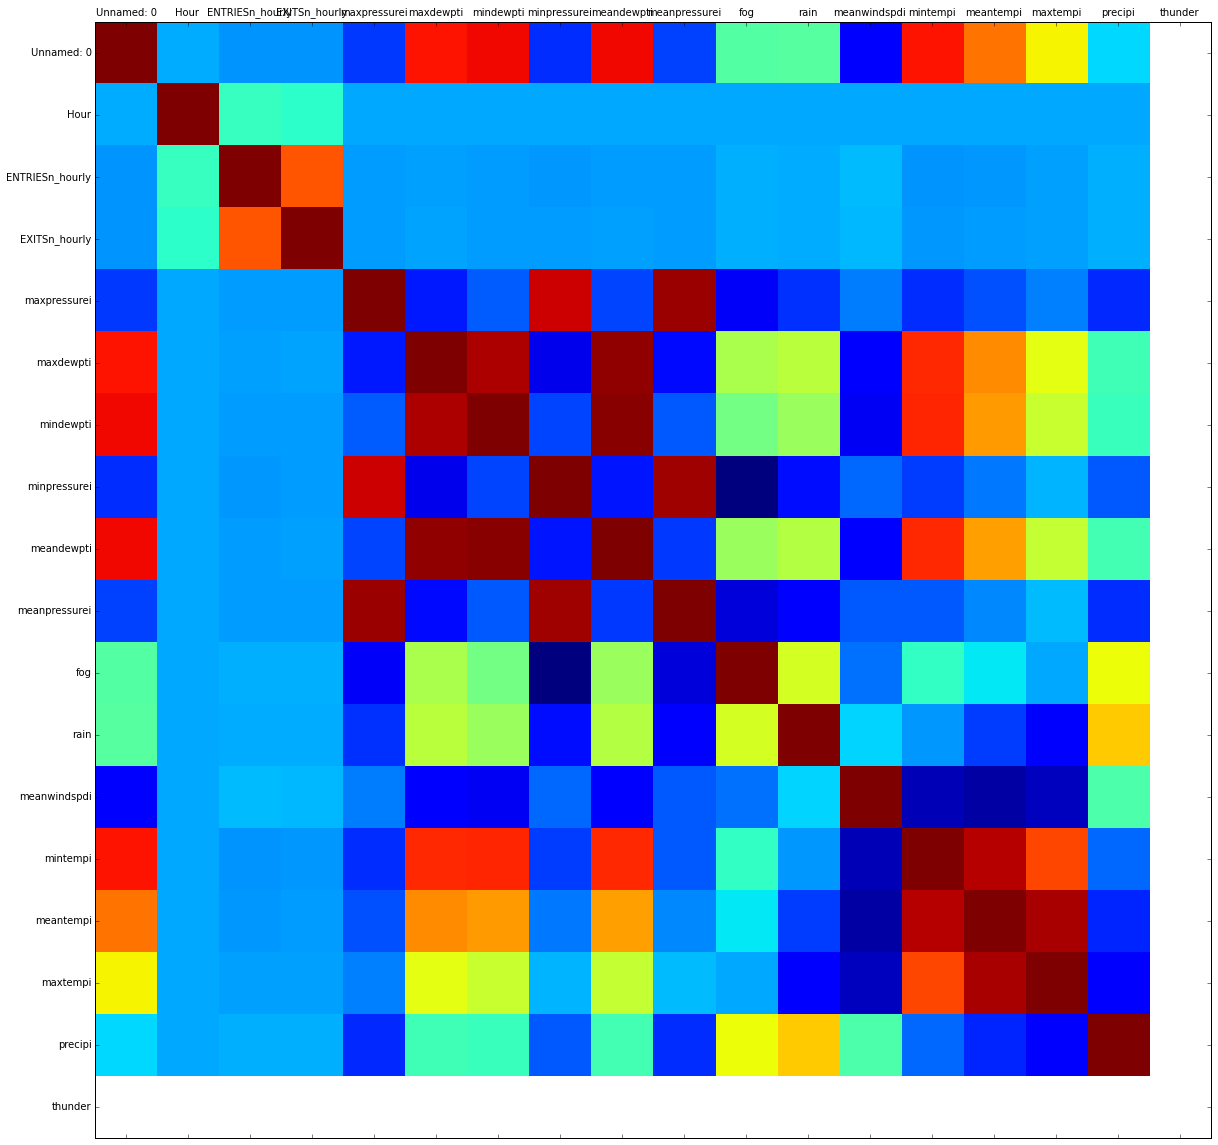

In [286]:
# correlation matrix - plot
print turnstileData.columns.values
corr = turnstileData.corr()
fig, ax = plt.subplots(figsize=(20, 20))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns);

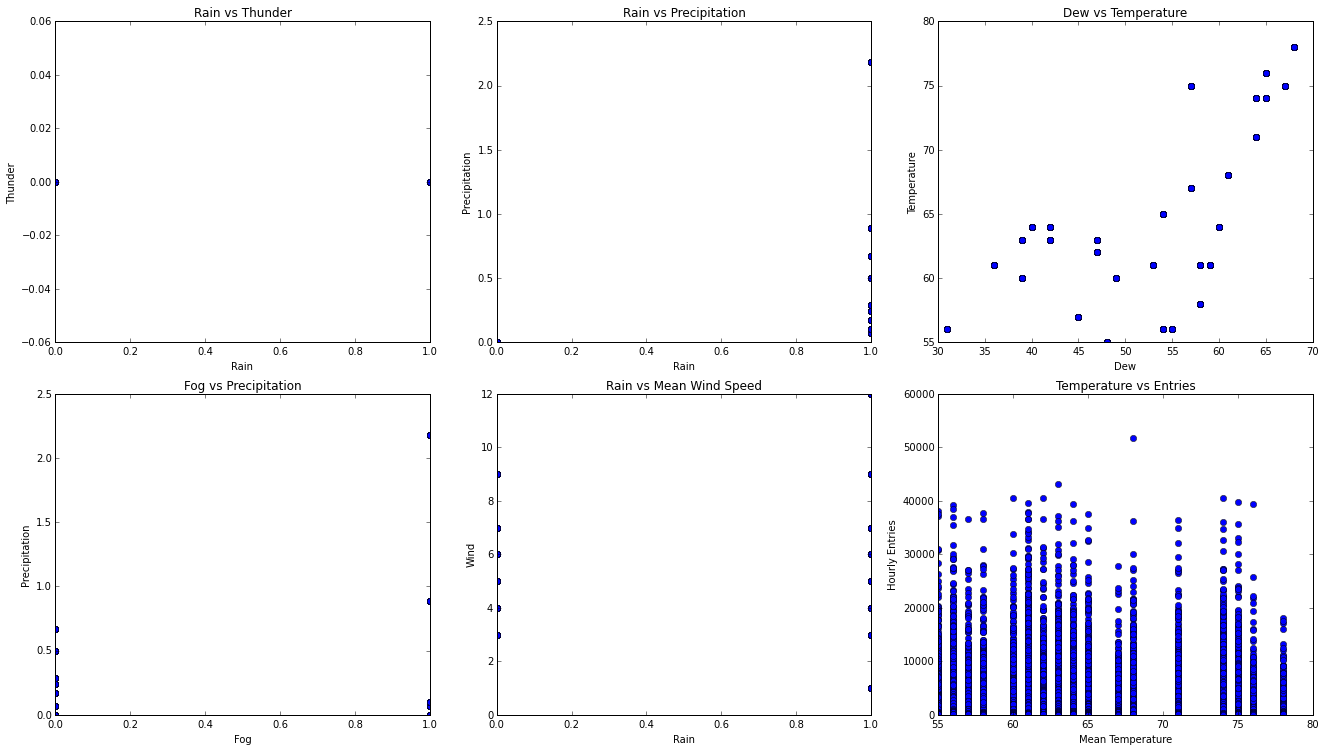

In [287]:
# investigate relationships between weather variables
fig, ax = plt.subplots(2, 3)
fig.set_size_inches(18.5, 10.5)
ax[0, 0].plot(turnstileData['rain'], turnstileData['thunder'], 'o') # no thunder
ax[0, 0].set_title('Rain vs Thunder')
ax[0, 0].set_xlabel('Rain')
ax[0, 0].set_ylabel('Thunder')
ax[0, 1].plot(turnstileData['rain'], turnstileData['precipi'], 'o') # include rain or precipitation in model
ax[0, 1].set_title('Rain vs Precipitation')
ax[0, 1].set_xlabel('Rain')
ax[0, 1].set_ylabel('Precipitation')
ax[1, 0].plot(turnstileData['fog'], turnstileData['precipi'], 'o')
ax[1, 0].set_title('Fog vs Precipitation')
ax[1, 0].set_xlabel('Fog')
ax[1, 0].set_ylabel('Precipitation')
ax[1, 1].plot(turnstileData['rain'], turnstileData['meanwindspdi'], 'o')
ax[1, 1].set_title('Rain vs Mean Wind Speed')
ax[1, 1].set_xlabel('Rain')
ax[1, 1].set_ylabel('Wind')
ax[0, 2].plot(turnstileData['meandewpti'], turnstileData['meantempi'], 'o')
ax[0, 2].set_title('Dew vs Temperature')
ax[0, 2].set_xlabel('Dew')
ax[0, 2].set_ylabel('Temperature')
ax[1, 2].plot(turnstileData['meantempi'], turnstileData['ENTRIESn_hourly'], 'o')
ax[1, 2].set_title('Temperature vs Entries')
ax[1, 2].set_xlabel('Mean Temperature')
ax[1, 2].set_ylabel('Hourly Entries')
fig.tight_layout() # adjusts spacing between plots

We would expect that certain weather conditions such as rain, low temperatures, wind etc. will increase the number of people who use trains (in favor of walking or cycling etc). We have already seen that rainy days and non-rainy days have a significant difference in entries in the previous section. Therefore we will try fitting a model with those variables. Also we will allow the intercept of our model to vary for different units (dummy variables) as some stations might be more (or less) busy in general. 

In [288]:
# Let us create the dataset which we will use in the ols function
features = turnstileData[['meanpressurei','fog', 'meanwindspdi', 'meantempi', 'precipi', 'meandewpti']] 
dummy_units = pandas.get_dummies(turnstileData['UNIT'], prefix='unit')
dummy_units = dummy_units.drop(dummy_units[[0]], axis = 1) # remove reference level
features = features.join(dummy_units) # create dummy variables 
features['constant'] = 1 # add a constant (Intercept)
y_values = turnstileData['ENTRIESn_hourly']

# examine data
print features.head()
print y_values.head()

   meanpressurei  fog  meanwindspdi  meantempi  precipi  meandewpti  \
0          30.27    0             5         60        0          39   
1          30.27    0             5         60        0          39   
2          30.27    0             5         60        0          39   
3          30.27    0             5         60        0          39   
4          30.27    0             5         60        0          39   

   unit_R002  unit_R003  unit_R004  unit_R005    ...     unit_R544  unit_R545  \
0          0          0          0          0    ...             0          0   
1          0          0          0          0    ...             0          0   
2          0          0          0          0    ...             0          0   
3          0          0          0          0    ...             0          0   
4          0          0          0          0    ...             0          0   

   unit_R546  unit_R547  unit_R548  unit_R549  unit_R550  unit_R551  \
0          0   

Now let's fit our linear regression model.

In [289]:
olsmod = sm.OLS(y_values, features)
olsres = olsmod.fit()
print olsres.rsquared_adj

nonDummySummary = pandas.DataFrame({'coef': np.asarray(olsres.params[0:6]), 'pvalues': np.asarray(olsres.pvalues[0:6])})
nonDummySummary.index = olsres.pvalues[0:6].index
print nonDummySummary    

0.417457265303
                     coef       pvalues
meanpressurei -197.875299  7.878568e-07
fog            101.622111  6.887815e-10
meanwindspdi    23.622198  1.777908e-17
meantempi       -3.646732  7.055571e-04
precipi        -27.090959  6.287826e-02
meandewpti      -2.459373  6.577725e-04


We can see that the adjusted R-squared is not particularly high (there are also problems with the normality & independence assumptions of the residuals but we won't go into that). How can we use our data to get better predictions? We haven't taken into consideration what day of the week it is. This will probably be an important predictor as we would expect, for example, to have more people using the tube on workdays.

In [290]:
import datetime

turnstileData['WEEKDAY'] = turnstileData['DATEn'].apply(lambda x:  datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%A'))
weekdayDummies = pandas.get_dummies(turnstileData['WEEKDAY'], prefix='wday')
weekdayDummies = weekdayDummies.drop(weekdayDummies[['wday_Sunday']], axis = 1) # use Sunday as the reference level

features = features.join(weekdayDummies)


In [291]:
# Fit ols model again
olsmod = sm.OLS(y_values, features)
olsres = olsmod.fit()
print olsres.rsquared_adj

nonDummySummary = pandas.DataFrame({'coef': np.asarray(olsres.params[0:6]), 'pvalues': np.asarray(olsres.pvalues[0:6])})
nonDummySummary.index = olsres.pvalues[0:6].index
print nonDummySummary

0.429243581432
                     coef       pvalues
meanpressurei -151.781002  3.691986e-04
fog             95.634201  4.046050e-07
meanwindspdi     5.907998  1.167394e-01
meantempi       -7.754018  1.832213e-12
precipi       -114.294420  8.333726e-11
meandewpti       0.261716  7.215706e-01


We can see that the adjusted R-squared has slightly increased, but not by a lot. Let's also try adding the time of day in the model.

In [292]:
hourDummies = pandas.get_dummies(turnstileData['Hour'], prefix = 'hour')
hourDummies = hourDummies.drop(hourDummies[['hour_0']], axis = 1)
features = features.join(hourDummies)



In [293]:
# Fit ols model again
olsmod = sm.OLS(y_values, features)
olsres = olsmod.fit()
print olsres.rsquared_adj
nonDummySummary = pandas.DataFrame({'coef': np.asarray(olsres.params[0:7]), 'pvalues': np.asarray(olsres.pvalues[0:7])})
nonDummySummary.index = olsres.pvalues[0:7].index
print nonDummySummary

0.512618679118
                      coef       pvalues
meanpressurei  -145.007263  2.317078e-04
fog              97.696156  2.132468e-08
meanwindspdi      5.296472  1.280787e-01
meantempi        -8.128261  1.317201e-15
precipi        -115.016736  1.526938e-12
meandewpti        0.358032  5.978475e-01
unit_R002     -3065.631494  1.033912e-72


Including the hour of the day as a predictor has increased the adjusted R squared considerably! However, does that indicate a good model fit? Let us visually check how good our model really is.

In [294]:
import pandasql as psql

turnstileData['date'] = turnstileData['DATEn'].apply(lambda x:  datetime.datetime.strptime(x, "%Y-%m-%d"))
turnstileData['date_time'] = turnstileData['DATEn'] + ' ' + turnstileData['TIMEn']
turnstileData['date_time'] = turnstileData['date_time'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))
   

dummy_df = turnstileData.loc[:, ('date', 'date_time','ENTRIESn_hourly')]
dummy_df['ENRIESn_hourly_pred'] = pandas.Series(olsres.fittedvalues, index = dummy_df.index)
dummy_df['date_time'] = pandas.to_datetime(dummy_df['date_time'])  
dummy_df = dummy_df.set_index('date_time')

# group by day
groupedDat = psql.sqldf('''SELECT [date], SUM([ENTRIESn_hourly]) as daily_entries, 
                                          SUM([ENRIESn_hourly_pred]) as daily_entries_pred
                         FROM dummy_df
                         GROUP BY [date]''', locals())

# convert to datetime
groupedDat['date'] = groupedDat['date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S").date())

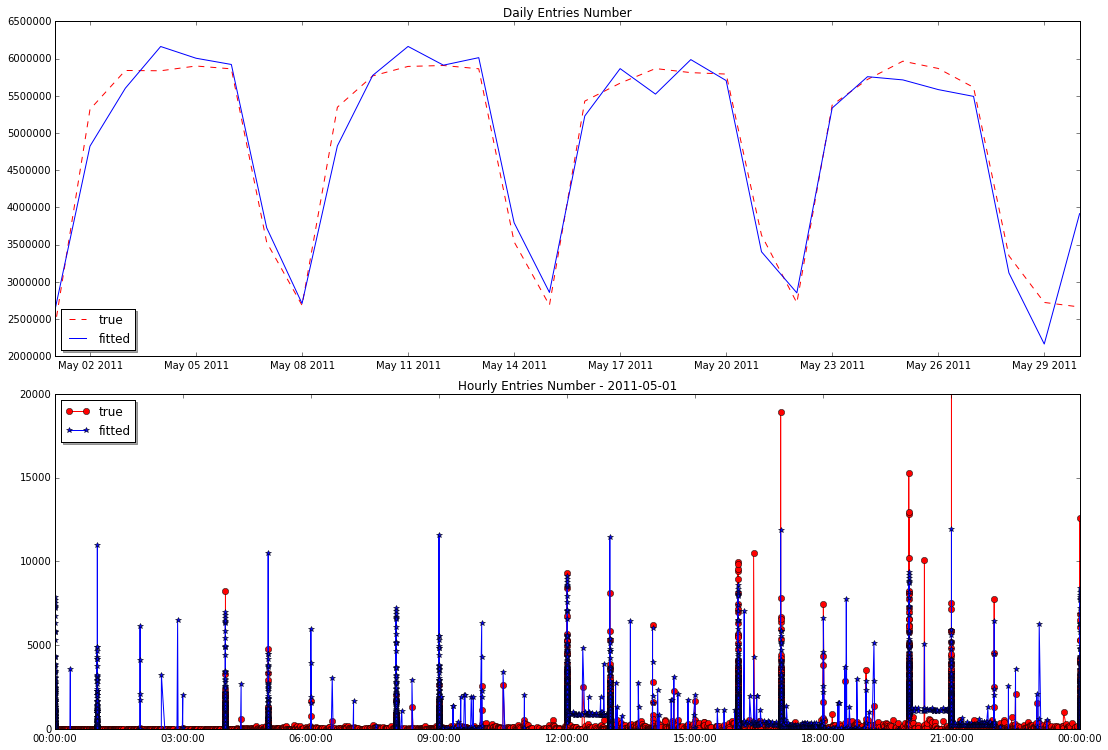

In [295]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(2, 1)
fig.set_size_inches(15.5, 10.5)
ax[0].plot(groupedDat['date'], groupedDat['daily_entries'], 'r--', label = "true")
ax[0].plot(groupedDat['date'], groupedDat['daily_entries_pred'], 'b', label = "fitted")
ax[0].legend(loc = 'lower left', shadow = True)
ax[0].fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
ax[0].set_title('Daily Entries Number')


dummy_df = dummy_df.sort_index()
ax[1].plot(dummy_df.index, dummy_df['ENTRIESn_hourly'], 'r-o', label = "true")
ax[1].plot(dummy_df.index, dummy_df['ENRIESn_hourly_pred'], 'b-*', label = "fitted")
ax[1].legend(loc = 'upper left', shadow = True)
ax[1].set_xlim([datetime.datetime(2011, 5, 1), datetime.datetime(2011, 5, 2)])
ax[1].set_ylim([-5, 20000])
ax[1].fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
ax[1].set_title('Hourly Entries Number - 2011-05-01')
fig.tight_layout() # adjusts spacing between plots




Observing the plots above, we can see that on a daily level the fitted values are not very far from the exact values, this is not the case however for the hourly level.